# Prediction heart disease using machine learning

This note book looks into using various python-based machine learning and data science libaries in an attemt to build a machine learning model capable of prediction whether or not someone has heart disease based on there medical attribute.

We're going to take the following approches
1. problem defination
2. Data
3. Evaluation
4. Featuring
5. Modelling
6. Experimentation


## 1. Problem Defination
In a statement

> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The original data came from the Cleavland data from the UCI machine learning Repository.https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a vesion of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at prediction whether or not a patirn has heart disease during the proof of concept, we'll porsure the project

## 4. feartures

This is where you'll get diffrent information about each of the fetures in our data

**Create data dictionary**

* Column Descriptions:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (1=Male/ 0= Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## Preparing the tool

We are going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [3]:
# Import all the tool we need

# Regular ERA (exploratory data analysis) and plotting liabaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plot to appear in the nootbook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve 

## Load data

In [5]:
df= pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration 

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat diffrent types.
3. What are thr outlines and why should you care about them?
4. Where are the outlines and why should you care about them?
5. How can we ad, change or remove features to get more to our data

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Let find out how many of each classe there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

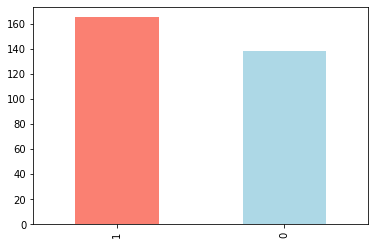

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
# Let get diffrent information abour our data fram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


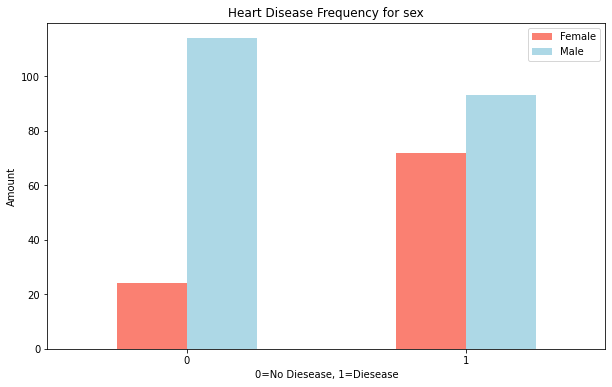

In [30]:
#Ceate a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", 
                                         figsize=(10, 6),
                                         color=["salmon","lightblue"])


plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Diesease, 1=Diesease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

How about we compare the target(Heart diesease or not) and fbs (if fasting blood sugar > 120 mg/dl)

In [32]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [33]:
# let do crosstab with the target
pd.crosstab(df["target"], df["fbs"])

fbs,0,1
target,,
0,116,22
1,142,23


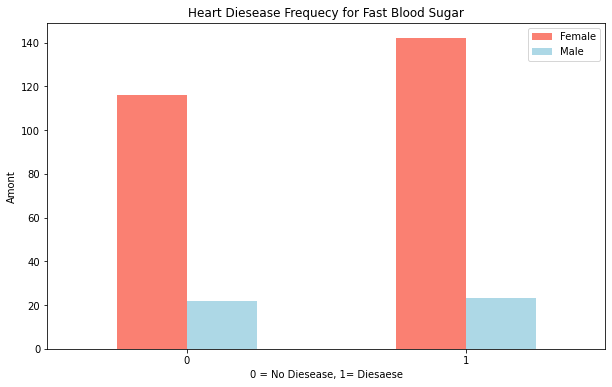

In [38]:
# Let's plot the graph to compare
pd.crosstab(df["target"], df["fbs"]).plot(kind="bar",
                                         figsize=(10, 6),
                                         color=["salmon", "lightblue"])

plt.title("Heart Diesease Frequecy for Fast Blood Sugar")
plt.xlabel("0 = No Diesease, 1= Diesaese")
plt.ylabel("Amont")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs max Heart Rate for Heart Disease

In [40]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

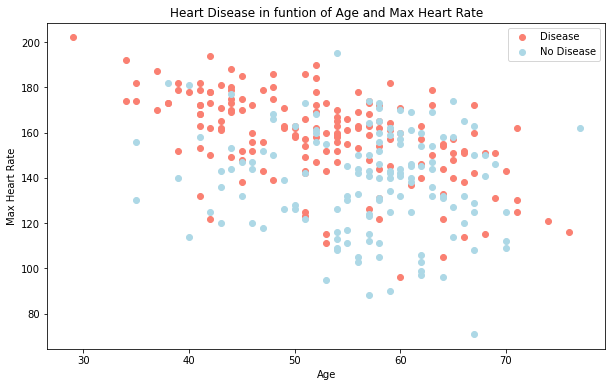

In [51]:
# Creating another figure
plt.figure(figsize=(10, 6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon")

# Scatter with nagative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue")


# Add some helpful infp
plt.title("Heart Disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

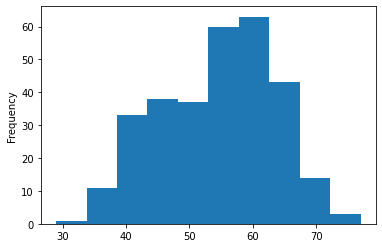

In [53]:
# Check the age distribution with a histogram
df.age.plot.hist();  
# Normal distribution curve

### Heart Disease Frequency per chest pain Types

cp- cheast pain type:

  0. Typical angina: chet pain related decrease blood supply to the heart
  1. Atypical angina: Chest pain not realated to heart
  2. Non-anginal pain: typical esophageal spasms (non heart related)
  3. Asymptomatic: chest pain not showing sings of disease

In [56]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [57]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


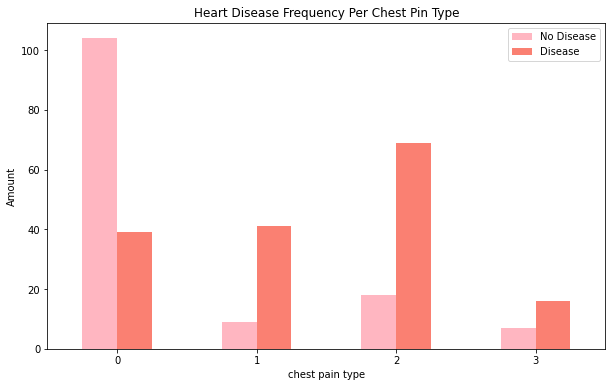

In [66]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                  figsize=(10, 6),
                                  color=["lightpink", "salmon"])

# Add some comunication
plt.title("Heart Disease Frequency Per Chest Pin Type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [67]:
# Make a correletion metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


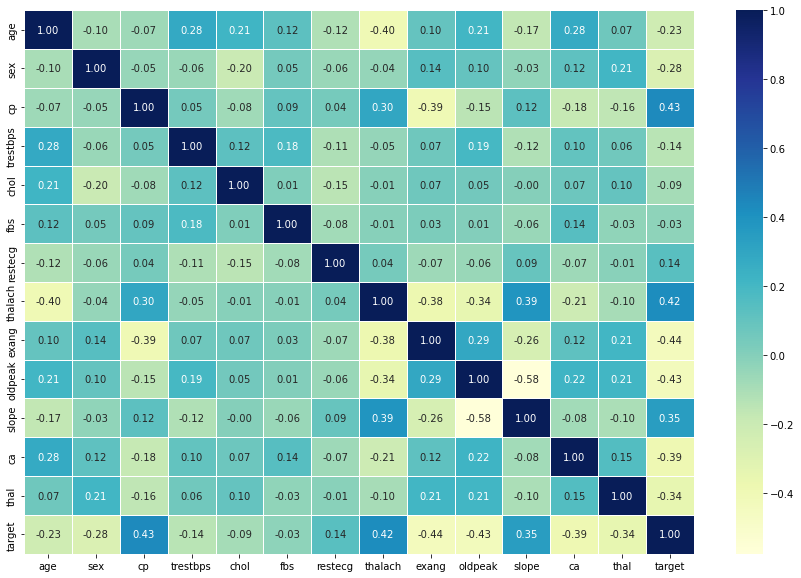

In [77]:
# Let's make our correlation matrix a little prettier
corr_matrix= df.corr()
fig, ax= plt.subplots(figsize=(15, 10))

ax= sns.heatmap(corr_matrix,
               fmt=".2f",
               linewidths=0.5,
               annot=True,
               cmap="YlGnBu")

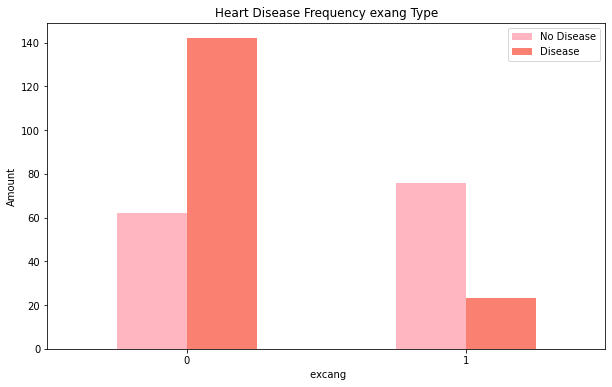

In [78]:
# Make the crosstab more visual
pd.crosstab(df.exang, df.target).plot(kind="bar", 
                                  figsize=(10, 6),
                                  color=["lightpink", "salmon"])

# Add some comunication
plt.title("Heart Disease Frequency exang Type")
plt.xlabel(" excang")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## 5. Modelling

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# Split data into X and y
x= df.drop("target", axis=1)

y= df["target"]

In [82]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [83]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [84]:
# Let's split our data into train and test split
# set random seed
np.random.seed(42)

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2) 

Now we have got our data split into train and test set, its time we bulid our machine learning model

we'll train it on the traning set

and we will test it on the test se

We are going to try three diffrent machine learning models:
1. Logistic Regression
2. RandomForestClassifier
3. K-NearestNeighbors Classifier

read this dave
https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

In [105]:
# Put model in a dictionary
models= { "Random Forest": RandomForestClassifier(),
            "Logistics Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
            "KNN": KNeighborsClassifier(),
        }

# Let create a funtion to fit and score our model

def fit_and_score(models,x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models
    models: a dict of diffrent Scikit-Learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no label)
    y_train: training labels
    y_test: testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model score
    model_scores= {}
    # Loop through our model
    for name, model in models.items():
        # Let fit the model
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_score
        model_scores[name]= model.score(x_test, y_test)
    return model_scores
    

In [106]:
model_scores= fit_and_score(models=models, x_train=x_train, 
                          x_test=x_test, y_train=y_train,y_test=y_test)

In [107]:
model_scores

{'Random Forest': 0.8360655737704918,
 'Logistics Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344}

In [108]:
models.items()

dict_items([('Random Forest', RandomForestClassifier()), ('Logistics Regression', LogisticRegression(max_iter=1000)), ('KNN', KNeighborsClassifier())])

## Model Comparism

In [117]:
# Let convert it into a pandas dataframe
model_compare= pd.DataFrame(model_scores, index=["Accracy"])
model_compare

,Random Forest,Logistics Regression,KNN
Accracy,0.836066,0.868852,0.688525


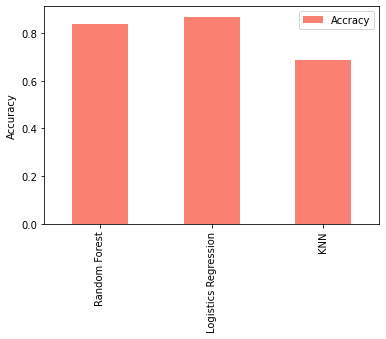

In [125]:
# Let visualized with plot
model_compare.T.plot.bar(color="salmon")
plt.ylabel("Accuracy");

Now we have a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.
what should we do?

Let's look at the following: 
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area Under curve (AUC)

## Hyperparameter tuning (by hand)

In [126]:
# let 's tune KNN

train_scores= []
test_scores= []

# Create a list of different values fro n_neighbors
neighbors= range(1, 21)

# Set up KNN instance
knn= KNeighborsClassifier()


#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))
    

In [129]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [130]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [131]:
neighbors

range(1, 21)

Maximum KNN score on the test data: 75.41%


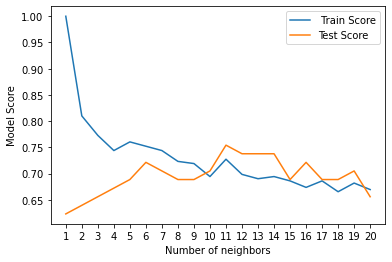

In [137]:
plt.plot(neighbors, train_scores, label=" Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperameter tuning with RandomizedSearchCv

We're going to turn:
* LogisticRegression
* Randomforest

...... using RandomSearchCV

In [160]:
# Create a hyperparameter grid for LogisticRregression
log_red_grig= {"C": np.logspace(-4, 4, 20),
              "solver": ["liblinear"],
              "penalty": ["l1", "l2"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
}

Now we've got hyperparameter grids setup for each of our models, let's turn them using RandomizedSearchCV..

In [147]:
# Turn  LogisticRegressionn

np.random.seed(42)

# Setup random hyperparameter search for logestic regression
rs_log_reg= RandomizedSearchCV(LogisticRegression(), 
                              param_distributions=log_red_grig,
                              n_iter=20,
                              cv=5,
                              verbose=True,)

# Fit random hyperparameter search model for logesticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [148]:
# Let check the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [149]:
# Let evaluate on our test data
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [150]:
# Create a hyperparameter grid for LogisticRregression
log_red_grig= {"C": [100, 10, 1.0, 0.1, 0.01],
              "solver": ["liblinear"],
              "penalty": ["l1", "l2"]}

In [152]:
# Turn  LogisticRegressionn

np.random.seed(42)

# Setup random hyperparameter search for logestic regression
rs_log_reg1= RandomizedSearchCV(LogisticRegression(), 
                              param_distributions=log_red_grig,
                              n_iter=30,
                              cv=5,
                              verbose=True,)

# Fit random hyperparameter search model for logesticRegression
rs_log_reg1.fit(x_train, y_train)

/home/olowu/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=30. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [155]:
rs_log_reg1.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}

In [156]:
rs_log_reg1.score(x_test, y_test)

0.8688524590163934

Now we've tuned LogisticRegression, let's do the same for RandomForestClassifier

In [161]:
# Setup random seed 
np.random.seed(42)

# Let use RandomzedSearchCv to build our model
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier(
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [162]:
# Let see our best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [163]:
# Let score our model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [164]:
model_scores

{'Random Forest': 0.8360655737704918,
 'Logistics Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again  using GridSearchCV...

In [168]:
# Diffrent hyperrarameter for our LogesticRegression model
log_reg_grid= {"C": np.logspace(-4, 4, 30),
              "solver": ["liblinear"]}

# Setup  grid search for our LogesticRegression model
gs_log_reg= GridSearchCV(LogisticRegression(),
                            param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [169]:
# Let check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [170]:
# Eveluate the grid seach Logistiocmodel
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyound accuracy

* ROC curve and AUC score
* Confusion matrix
* Clasification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-valiudation was used where possible.

To make comparism and evaluating our trained model, first we need to make prediction

In [174]:
# Make predictions with tuned model
y_preds= gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [175]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

/home/olowu/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


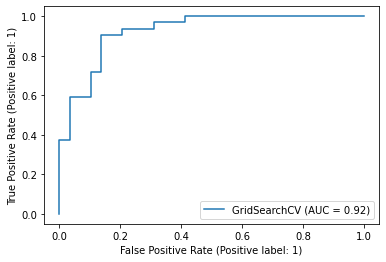

In [176]:
# Plot ROC curve and calculate AUC metrics
plot_roc_curve(gs_log_reg, x_test, y_test)

As we can see from above, plot_roc would no longer be available, in oder to keep ourselves up till date, let use what is avilable which are
* RocCurveDisplay.from_predictions
* sklearn.metrics.RocCurveDisplay.from_estimator`.

In [177]:
from sklearn.metrics import RocCurveDisplay

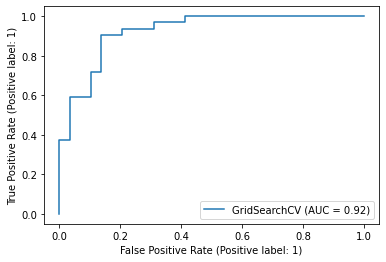

In [179]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [180]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


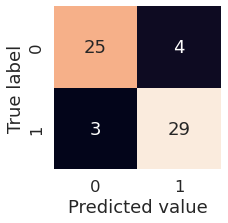

In [187]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax= plt.subplots(figsize= (3, 3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot= True,
                  cbar= False)
    
    plt.xlabel("Predicted value")
    plt.ylabel("True label")
    
    
plot_conf_mat(y_test, y_preds)

Another way to plot confusion matrix without stress

In [200]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [205]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.style.use("default")

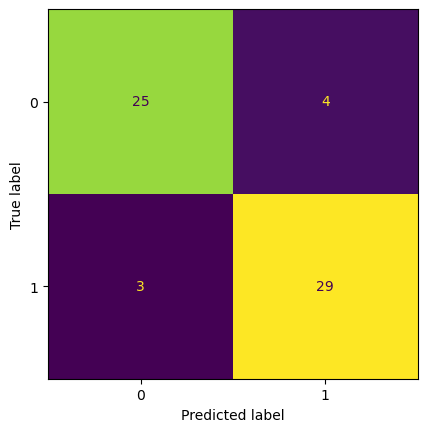

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds,
                                       colorbar=False,
                                       );

Now we've got a ROC curve, an AUC metrics and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1-score.

In [207]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of oue model using cross-validation and to do that we'll be using `cross-val_score`

In [210]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [209]:
# Let create a new classifier with best parameters
clf= LogisticRegression(C= 0.20433597178569418,
                       solver= "liblinear")

In [215]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, x, y, scoring="accuracy",
                        cv=5)
print(cv_acc)
# let take the mean
print(f"\nThe mean of our cross validation accuracy: {np.mean(cv_acc)}")

[0.81967213 0.90163934 0.86885246 0.88333333 0.75      ]

The mean of our cross validation accuracy: 0.8446994535519124


In [217]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8446994535519124

In [218]:
# Cross validated precision
cv_precision = cross_val_score(clf, x, y, scoring="precision",
                        cv=5)
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [220]:
cv_precision= np.mean(cv_precision)
cv_precision

0.8207936507936507

In [225]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                               x,
                               y,
                               scoring="recall",
                               cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [226]:
# Cross validated recall
cv_f1 = cross_val_score(clf,
                               x,
                               y,
                               scoring="f1",
                               cv=5)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [228]:
# Visualized cross_validated metrics
cv_metrics= pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1_Score": cv_f1},
                        index=["score"])

In [229]:
cv_metrics

,Accuracy,Precision,Recall,F1_Score
score,0.844699,0.820794,0.921212,0.867301


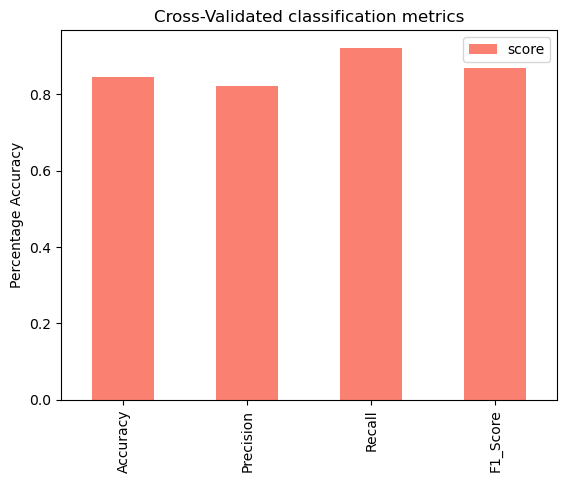

In [251]:
# let create a plot
cv_metrics.T.plot.bar(color="salmon")
plt.title("Cross-Validated classification metrics")
plt.ylabel("Percentage Accuracy")
plt.savefig("Cross-validated classification metrics");

### Feature importance 

Feature importance is another way oof asking, "Which features contributed most of the outcomes and how  did they contribute?

Finding Features importance is differnt for each machine learning model.. One way to find features importance is to search for (MODEL NAME) feature importance

Let's find the feature importance of our LogisticsRegression Model..

In [238]:
# Fit an insatace of LogisticRegression
clf= LogisticRegression(C= 0.20433597178569418,
                       solver= "liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [241]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


The .coef_ funtions shows us how each of the featues we have in our
data set contribute to our target

In [239]:
# Check coef
clf.coef_


array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [243]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

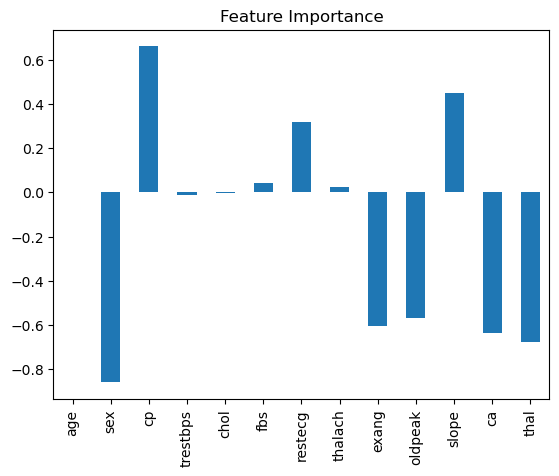

In [248]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [249]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [250]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

if you havent'n hit your evaluation metric yet.. ask yourself

* Could you collect more data?
* Could try a better model? CatBoost or XGBoost?
* Could you improve the current models? (beyound what we've done so far)
* If your model is good enough (you have hit your evaluation metrics) how would you export it and share it with others"?

